### I_ Essayer le code de l'OCR

Le code de l'ocr :
https://keras-ocr.readthedocs.io/en/latest/examples/using_pretrained_models.html

In [11]:
from sklearn.metrics import confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import os

# img="data/SROIE2019/train/img/X00016469612.jpg"
# img =os.listdir('data/SROIE2019/test/img')
# img ='data/SROIE2019/test/img'
# print(img[:3])

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(z) for z in [
        "data/SROIE2019/test/img/X00016469670.jpg",
        "data/SROIE2019/test/img/X00016469671.jpg"
    ]
]
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

Looking for C:\Users\charl\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\charl\.keras-ocr\crnn_kurapan.h5
7/7 [==============================] - 35s 5s/step


<Axes: >

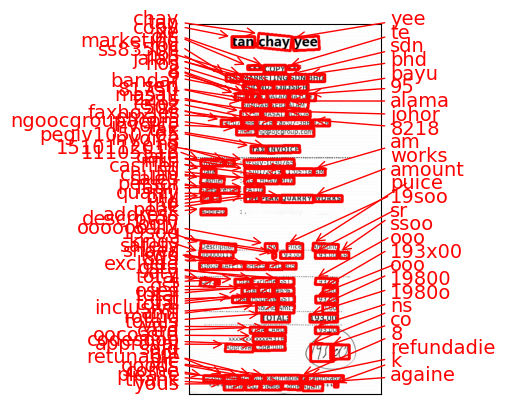

In [13]:
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])

In [15]:
from matplotlib import image as mpimg
image = mpimg.imread(img)
plt.imshow(image)

AttributeError: 'list' object has no attribute 'read'

### II_ Prédictions detecteur sur mes données 

II_1 loader le modèle sur mes données 

In [16]:
import os
os.listdir('data/SROIE2019/test/img')

['X00016469670.jpg',
 'X00016469671.jpg',
 'X51005200931.jpg',
 'X51005230605.jpg',
 'X51005230616.jpg',
 'X51005230621.jpg',
 'X51005230648.jpg',
 'X51005230657.jpg',
 'X51005230659.jpg',
 'X51005268275.jpg',
 'X51005268408.jpg',
 'X51005288570.jpg',
 'X51005301666.jpg',
 'X51005337867.jpg',
 'X51005337877.jpg',
 'X51005361906.jpg',
 'X51005361908.jpg',
 'X51005361912.jpg',
 'X51005361923.jpg',
 'X51005365187.jpg',
 'X51005433518.jpg',
 'X51005433543.jpg',
 'X51005433548.jpg',
 'X51005433556.jpg',
 'X51005442322.jpg',
 'X51005442334.jpg',
 'X51005442343.jpg',
 'X51005442366.jpg',
 'X51005442375.jpg',
 'X51005442382.jpg',
 'X51005442388.jpg',
 'X51005444040.jpg',
 'X51005444041.jpg',
 'X51005444044.jpg',
 'X51005444046.jpg',
 'X51005447841.jpg',
 'X51005447842.jpg',
 'X51005447844.jpg',
 'X51005447851.jpg',
 'X51005447859.jpg',
 'X51005568855.jpg',
 'X51005568866.jpg',
 'X51005568885.jpg',
 'X51005568887.jpg',
 'X51005568889.jpg',
 'X51005568890.jpg',
 'X51005568892.jpg',
 'X5100556889

In [20]:
import matplotlib.pyplot as plt
import keras_ocr
import os

# faire la boucle pour ouvrir les images du fichier de test

img=os.listdir("data/SROIE2019/test/img")

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images= [
     keras_ocr.tools.read(image) for image in [
         img
     ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

Looking for C:\Users\charl\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\charl\.keras-ocr\crnn_kurapan.h5


UnboundLocalError: local variable 'image' referenced before assignment

In [ ]:
img

### III_ Benchmarker

#### III_1_ Sur quelles métrics allons nous-nous baser?

**Precision** : pourcentage de fois où le détecteur a correctement prédit la position d'un bbox.

**Recall** : pourcentage de fois où le détecteur a détecté un bbox présent dans l'image.

**IoU (Intersection over Union)** : mesure de la similitude entre deux bboxes. Il est calculé en divisant l'intersection des deux bboxes par leur union.

**F1-score**: score composite qui prend en compte à la fois la précision et le rappel. Il est calculé comme la moyenne harmonique de la précision et du rappel.

In [3]:
prediction_groups

[[('chay',
   array([[168.3315  ,  22.350687],
          [248.54796 ,  30.794525],
          [244.9918  ,  64.57809 ],
          [164.77534 ,  56.134247]], dtype=float32)),
  ('tan',
   array([[103.,  30.],
          [158.,  30.],
          [158.,  56.],
          [103.,  56.]], dtype=float32)),
  ('yee',
   array([[250.97258 ,  32.45137 ],
          [312.56857 ,  29.371576],
          [314.1895  ,  61.790535],
          [252.59354 ,  64.87033 ]], dtype=float32)),
  ('xe',
   array([[141., 100.],
          [175., 100.],
          [175., 110.],
          [141., 110.]], dtype=float32)),
  ('copy',
   array([[180.99998,  99.     ],
          [233.99998,  99.     ],
          [233.99998, 117.     ],
          [180.99998, 117.     ]], dtype=float32)),
  ('te',
   array([[239., 100.],
          [263., 100.],
          [263., 110.],
          [239., 110.]], dtype=float32)),
  ('ojc',
   array([[ 89., 121.],
          [125., 121.],
          [125., 138.],
          [ 89., 138.]], dtype=float32

### Comparison matrix

In [8]:
len(prediction_groups[0])

110

In [9]:
len(prediction_groups[1])

99

faire une matrice de comparaison 

In [ ]:
y_true = [2, 0, 2, 2, 0, 1]
 y_pred = [0, 0, 2, 2, 0, 2]
>>> confusion_matrix(y_true, y_pred)
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

a quoi ressemble mes labels?

*penser à sauvegarder cette version du modèle ? (imagine c'est le meilleur!)

In [16]:
import os
os.listdir('data/SROIE2019/test/box')

['X00016469670.txt',
 'X00016469671.txt',
 'X51005200931.txt',
 'X51005230605.txt',
 'X51005230616.txt',
 'X51005230621.txt',
 'X51005230648.txt',
 'X51005230657.txt',
 'X51005230659.txt',
 'X51005268275.txt',
 'X51005268408.txt',
 'X51005288570.txt',
 'X51005301666.txt',
 'X51005337867.txt',
 'X51005337877.txt',
 'X51005361906.txt',
 'X51005361908.txt',
 'X51005361912.txt',
 'X51005361923.txt',
 'X51005365187.txt',
 'X51005433518.txt',
 'X51005433543.txt',
 'X51005433548.txt',
 'X51005433556.txt',
 'X51005442322.txt',
 'X51005442334.txt',
 'X51005442343.txt',
 'X51005442366.txt',
 'X51005442375.txt',
 'X51005442382.txt',
 'X51005442388.txt',
 'X51005444040.txt',
 'X51005444041.txt',
 'X51005444044.txt',
 'X51005444046.txt',
 'X51005447841.txt',
 'X51005447842.txt',
 'X51005447844.txt',
 'X51005447851.txt',
 'X51005447859.txt',
 'X51005568855.txt',
 'X51005568866.txt',
 'X51005568885.txt',
 'X51005568887.txt',
 'X51005568889.txt',
 'X51005568890.txt',
 'X51005568892.txt',
 'X5100556889

In [18]:
sample_1='data/SROIE2019/test/box/X00016469670.txt'
sample_1
# data/SROIE2019/test/box/X00016469671.txt

'data/SROIE2019/test/box/X00016469670.txt'

In [21]:
# from PIL import Image
# import keras_ocr
with open(sample_1, "r") as f:
    print(f.read())

'chay',
   array([[168.3315  ,  22.350687],
          [248.54796 ,  30.794525],
          [244.9918  ,  64.57809 ],
          [164.77534 ,  56.134247]], dtype=float32)),

98,26,321,26,321,66,98,66,TAN CHAY YEE
138,95,279,95,279,120,138,120,*** COPY ***
80,119,329,119,329,140,80,140,OJC MARKETING SDN BHD
129,142,287,142,287,160,129,160,ROC NO: 538358-H
104,163,306,163,306,182,104,182,NO 2 & 4, JALAN BAYU 4,
123,185,286,185,286,205,123,205,BANDAR SERI ALAM,
116,205,292,205,292,223,116,223,81750 MASAI, JOHOR
69,226,339,226,339,248,69,248,TEL:07-388 2218 FAX:07-388 8218
110,249,300,249,300,272,110,272,EMAIL:NG@OJCGROUP.COM
145,291,266,291,266,313,145,313,TAX INVOICE
27,326,109,326,109,341,27,341,INVOICE NO
116,322,259,322,259,343,116,343,: PEGIV-1030765
25,347,72,347,72,365,25,365,DATE
121,348,326,348,326,363,121,363,: 15/01/2019 11:05:16 AM
20,369,84,369,84,387,20,387,CASHIER
120,367,253,367,253,385,120,385,: NG CHUAN MIN
29,390,180,390,180,408,29,408,SALES PERSON : FATIN
27,412,71,412,71,429,27,429,BILL TO
119,412,365,412,365,428,119,428,: THE PEAK QUARRY WORKS
23,441,87,441,87,465,23,465,ADDRESS
112,444,140,444,140,459,112,459,:.
26,527,114,527,114,543,2